<a href="https://colab.research.google.com/github/jdelima01/PYthon_Spark_stat_IL/blob/main/Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando JDK 8, Hadoop e Spark

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz

#Verificar as versões disponíveis no site do Apache Foudation

!tar xf spark-3.3.2-bin-hadoop3.tgz

!pip install -q pyspark
!pip install -q findspark



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 19.2 MB/s eta 0:00:00


Definindo variáveis de ambiente

In [2]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"

import findspark

#Em branco para procurar onde seja possível
print(findspark.init(spark_home=""))


None


Ler aquivo de dados de texto plano com Spark

In [3]:
from pyspark.sql import SparkSession


spark = SparkSession.builder.master('local[*]').appName('Iniciando com Spark').config('spark.ui.port', '4050').getOrCreate()

dataset = spark.read.csv('/content/sample_data/california_housing_test.csv',inferSchema=True, header =True)
dataset.printSchema()
dataset.head()

spark.stop()



root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)



PySpark

In [4]:
from pyspark import SparkContext


spark_contex = SparkContext()
print(spark_contex)
print(spark_contex.getLocalProperty)
print(spark_contex.version)

spark_contex.stop()

<SparkContext master=local[*] appName=Iniciando com Spark>
<bound method SparkContext.getLocalProperty of <SparkContext master=local[*] appName=Iniciando com Spark>>
3.3.2


In [11]:
from pyspark.sql import SparkSession 
spark = SparkSession.builder.getOrCreate() # Create my_spark
print(spark) # Print my_spark

dataset = spark.read.csv('/content/sample_data/california_housing_test.csv',inferSchema=True, header =True)
dataset.head()

dataset.createOrReplaceTempView("tabela_temporaria")
print(spark.catalog.listTables()) 

query = "FROM tabela_temporaria SELECT longitude, latitude LIMIT 10"  
saida = spark.sql(query)  
saida.show() 

[Table(name='tabela_temporaria', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]
+---------+--------+
|longitude|latitude|
+---------+--------+
|  -122.05|   37.37|
|   -118.3|   34.26|
|  -117.81|   33.78|
|  -118.36|   33.82|
|  -119.67|   36.33|
|  -119.56|   36.51|
|  -121.43|   38.63|
|  -120.65|   35.48|
|  -122.84|    38.4|
|  -118.02|   34.08|
+---------+--------+



Data Frames (Spark - SQL)

In [12]:
#Comando AQL
query1 = "SELECT MAX(total_rooms) as maximo_quartos FROM tabela_temporaria"

#Spark SQL
q_maximo_quartos = spark.sql(query1)
pd_maximo_quartos = q_maximo_quartos.toPandas()
print('A quantidade máxima de quartos é: {}'.format(pd_maximo_quartos['maximo_quartos']))
qtd_maximo_quartos = int(pd_maximo_quartos.loc[0,'maximo_quartos'])


A quantidade máxima de quartos é: 0    30450.0
Name: maximo_quartos, dtype: float64


In [17]:
#comando SQL
query2 = "SELECT longitude, latitude FROM tabela_temporaria WHERE total_rooms = "+str(qtd_maximo_quartos)

#Spark SQL
localizacao_maximo_quartos = spark.sql(query2)

#PConversão para andas
pd_localizacao_maximo_quartos = localizacao_maximo_quartos.toPandas()
print(pd_localizacao_maximo_quartos.head()) 

   longitude  latitude
0     -117.2     33.58


Pandas e SparK

In [32]:
import pandas as pd
import numpy as np
media = 0; desvio_padrao=0.1 

#Criação de um DF Pandas randomico com NumPy
pd_temporario = pd.DataFrame(np.random.normal(media,desvio_padrao,100))
#print(pd_temporario)

#Conversão para o Spark
spark_temporario = spark.createDataFrame(pd_temporario)
print(spark.catalog.listTables())

#Agregar o novo DataFrame o set do Spark
spark_temporario.createOrReplaceTempView("nova_tabela_temporaria")
print(spark.catalog.listTables())
print(spark.table("nova_tabela_temporaria"))

spark.stop()


[Table(name='nova_tabela_temporaria', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='tabela_temporaria', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]
[Table(name='nova_tabela_temporaria', database=None, description=None, tableType='TEMPORARY', isTemporary=True), Table(name='tabela_temporaria', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]
DataFrame[0: double]


MapReduce

*--- Estudo sobre probabilidade randomica do algoritmo Ipsium Lorem ---*

2 	 palavra/s possuem o maior número ( 78 ) de repetições :	et , eu
57 	 palavra/s possuem o menor número ( 1 ) de repetições :	necSuspendisse , idPhasellus , massaNulla , curae;Aenean , egestasUt , ametNam , metusPraesent , mollisNunc , maurisSed , eleifendFusce , orciIn , estPhasellus , nullaMaecenas , placeratMauris , nisiDonec , facilisi , maximusInteger , nuncPellentesque , semDonec , massaNunc , risusMaecenas , enimPellentesque , feugiatNam , liberoCurabitur , aliquetDonec , lectusUt , duiFusce , dignissimPraesent , volutpatUt , diamPellentesque , anteUt , metusMorbi , egestasQuisque , magnaEtiam , hendreritUt , magnaPhasellus , ligulaPhasellus , dolorIn , inIn , justoSed , nislFusce , nequeInteger , maurisAliquam , aliquamEtiam , faucibusEtiam , ligulaDuis , eleifendSed , variusDuis , justoAliquam , quisVivamus , maximusUt , facilisisPhasellus , risusNunc , odioDonec , rhoncusVestibulum , ligulaCras , port

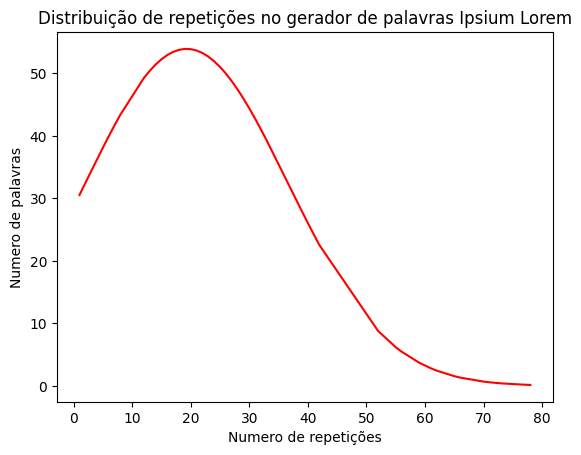

In [121]:
from numpy.core.fromnumeric import size
from posixpath import split
from io import FileIO
from pyspark import SparkContext
#Estancia uma contexto Spark
spark_contex.stop()
spark_contex = SparkContext()

#Criação de conjunto de dados numéricos ordenados
vetor = np.array([10, 20, 30, 40, 50])
#print(vetor)

#Cria um RRD com o vetor
paralelo = spark_contex.parallelize(vetor)
#print(paralelo)

#Realiza uma transformação estrita nos registros
mapa = paralelo.map(lambda x : x**2+x)
#print(mapa.collect())


### MAP REDUCE ###
#Lista de strings para RDD

arquivo = open('/content/sample_data/words.txt', 'r')
palavras = arquivo.readlines()
palavras = palavras[0].split(' ')


#paralelo_02 = spark_contex.parallelize(["distribuida", "distribuida", "spark", "rdd", "spark", "spark"])
paralelo_02= spark_contex.parallelize(palavras)
#print(paralelo_02)

#Operação Palavra >> Valor = 1
funcao_lambda = lambda x:(x,1)

#Mapeia (executa função e atribui valor), Reduz (soma chaves similares), Saida (Novo RDD com resultado)
from operator import add
mapa_02 = paralelo_02.map(funcao_lambda).reduceByKey(add).collect()
mapa_02.sort(key = lambda x:x[1], reverse = True)
### ###



#Crio um vetor com as repetições de palavras
valSet =[]
for (w, c) in mapa_02:
  valSet.append(c)


#print(mapa_02)

print('*--- Estudo sobre probabilidade randomica do algoritmo Ipsium Lorem ---*\n')

i = valSet.count(mapa_02[0][1])-1
print(i+1, "\t palavra/s possuem o maior número (", mapa_02[0][1], ") de repetições :\t", end='' )
while i >= 0:
  print(mapa_02[i][0], end='')
  print(' , ', end='') if i>0 else print('')
  i = i-1


mapa_02.reverse()
ii = valSet.count(mapa_02[0][1])-1
print(ii+1, "\t palavra/s possuem o menor número (", mapa_02[0][1], ") de repetições :\t", end='' )
while ii >= 0:
  print(mapa_02[ii][0], end='')
  print(' , ', end='') if ii>0 else print('')
  ii = ii-1


print('')

media_rep =np.mean(valSet)
print('Média de número de repetições por palavra:\t',media_rep)
st_desv = np.std(valSet)
print('Desvio padrão:\t\t\t\t\t', st_desv)
distrib = (np.pi*st_desv) * np.exp(-0.5*((valSet-media_rep)/st_desv)**2)

print('Tamanho da amostra:\t\t\t\t', size(palavras))

print('')

import matplotlib.pyplot as plt

plt.plot(valSet,distrib, color='red')

plt.title('Distribuição de repetições no gerador de palavras Ipsium Lorem')
plt.xlabel('Numero de repetições')
plt.ylabel('Numero de palavras')



spark_contex.stop()
